In [8]:
import pandas as pd
import numpy as np

# Path to your activation data file
file_path = r'C:\Users\quanz\Documents\UM\Projects\GLX_Project\DNN\MiND_Stimili\conv1_average_activation_matrix.csv'

# Load the data
data = pd.read_csv(file_path)

# Perform SVD
U, S, Vt = np.linalg.svd(data, full_matrices=False)

# Set the number of components to retain (e.g., 100)
n_components = 100

# Select the top components
U_reduced = U[:, :n_components]
S_reduced = np.diag(S[:n_components])
Vt_reduced = Vt[:n_components, :]

# Form the reduced matrix
reduced_data = np.dot(U_reduced, S_reduced)

# Save the reduced data
output_path = r'C:\Users\quanz\Documents\UM\Projects\GLX_Project\DNN\MiND_Stimili\conv1_svd_100_components.csv'
pd.DataFrame(reduced_data).to_csv(output_path, index=False)

print(f"SVD completed for conv1, saved to {output_path}")


SVD completed for conv1, saved to C:\Users\quanz\Documents\UM\Projects\GLX_Project\DNN\MiND_Stimili\conv1_svd_100_components.csv


In [9]:
# Calculate total variance
total_variance = np.sum(S**2)

# Calculate explained variance for the top 100 components
n_components = 100
explained_variance = np.sum(S[:n_components]**2)

# Calculate the explained variance ratio
explained_variance_ratio = explained_variance / total_variance
print(f"Explained Variance Ratio for top {n_components} components: {explained_variance_ratio:.2%}")

Explained Variance Ratio for top 100 components: 100.00%


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'pca' is the PCA model used earlier
# and 'kmeans' is the trained KMeans model
# Load original activation matrix
layer_file_path = '/home/tpolklabuser/Desktop/Violet/DNN/ML_RR/DNN_Activation/conv1_average_activation_matrix.csv'
activation_matrix = np.loadtxt(layer_file_path, delimiter=',', skiprows=1)  # Shape: (710016, 12)

# Step 1: Apply the same PCA transformation to the activation matrix
activation_matrix_pca = pca.transform(activation_matrix)  # Shape: (710016, 10)

# Step 2: Predict the closest centroids for each unit
closest_centroids = kmeans.predict(activation_matrix_pca)

# Step 3: Reconstruct the activation matrix using the closest centroids
reconstructed_matrix_pca = kmeans.cluster_centers_[closest_centroids]  # Shape: (710016, 10)

# Step 4: Inverse transform to get back to the original feature space
reconstructed_matrix = pca.inverse_transform(reconstructed_matrix_pca)  # Shape: (710016, 12)

# Step 5: Calculate the mean squared reconstruction error
reconstruction_error = mean_squared_error(activation_matrix, reconstructed_matrix)
print(f"Reconstruction Error (MSE): {reconstruction_error:.4f}")

# Step 6: Calculate explained variance as a measure of clustering performance
total_variance = np.var(activation_matrix)
explained_variance_ratio = 1 - (reconstruction_error / total_variance)
print(f"Explained Variance by Clustering: {explained_variance_ratio:.2%}")


Reconstruction Error (MSE): 3.3874
Explained Variance by Clustering: 99.09%


In [21]:
# This codes using SVD instead of PCA, according to Justine Zhang report, 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Load or create your activation matrix
file = r'C:\Users\quanz\Documents\UM\Projects\GLX_Project\DNN\MiND_Stimili\pool5_G_both_combined_matrix.csv'
activation_matrix = np.loadtxt(file, delimiter=',', skiprows=1) # Example loading step

# transform to .npy for futher use
np.save('pool5_G_both_combined_matrix.npy', activation_matrix)

# Define the number of components to keep (adjust based on the desired explained variance)
n_components = 100  # Choose an appropriate number based on variance explained or experiment needs

activation_matrix_centered = activation_matrix - np.mean(activation_matrix, axis=0)

scaler = StandardScaler()
activation_matrix_standardized = scaler.fit_transform(activation_matrix_centered)

# Transpose the matrix to reduce along the units dimension (710061)
activation_matrix_T = activation_matrix_standardized.T  # Now shape is [120, 710061]


# Perform Truncated SVD
svd = TruncatedSVD(n_components=n_components)
reduced_matrix = svd.fit_transform(activation_matrix_T)


# Transpose back to retain the structure where rows represent units
reduced_matrix = reduced_matrix.T  # Final shape will be [n_components, 120]

# Print the shape of the reduced matrix to verify dimensions
print("Reduced matrix shape:", reduced_matrix.shape)

# Print the explained variance ratio to understand how much of the original data is captured in the reduced matrix.
print("Explained variance ratio:", svd.explained_variance_ratio_.sum())

# Optional: Inspect the singular values, which represent the importance of each reduced dimension.
# High singular values correlate with high variance directions, often capturing meaningful structures in the data.
singular_values = svd.singular_values_
print("Singular values:", singular_values)

# Save the reduced matrix for future analysis or model input
np.save('reduced_activation_matrix.npy', reduced_matrix)

np.save('C:\\Users\\quanz\\Documents\\UM\\Projects\\GLX_Project\\DNN\\MiND_Stimili\\reduced_activation_matrix_pool5_G.npy', reduced_matrix)


Reduced matrix shape: (100, 120)
Explained variance ratio: 0.936822917623644
Singular values: [639.70775864 415.54301683 280.68413396 261.55004108 225.63190041
 221.77132021 211.94301027 202.81815585 193.31881678 184.95515729
 161.54693344 159.07386341 153.56667757 149.59928081 144.78217214
 143.23719612 142.45635432 137.20499916 135.77698488 133.46527947
 132.30438466 131.21599951 130.93386142 130.80486379 128.08702665
 127.73684811 126.59723336 125.98531272 125.61731607 124.66285357
 124.20969452 122.17164799 121.61226983 120.92377355 119.41504793
 118.9362767  117.4963938  116.77153625 116.16024833 115.5462175
 115.26695565 114.60400296 114.03742496 113.41441361 112.66539461
 112.55885402 111.56717562 111.39128293 110.70917051 110.09958978
 109.49979157 108.15661349 108.0228594  107.23456286 106.8004957
 106.60307582 105.51408146 104.5399704  104.21378825 103.35841338
 102.9507364  102.35874248 101.97880837 101.64694794 101.32570231
 100.54071625 100.19832113  99.73090396  98.750618

In [2]:
# This code will average the SVD matrix across time domain, so make the output from the previous chunck [100x120] to [100x6] condition-wise to prepare for risdge regression
import numpy as np
import glob

# Load all .npy files
file_paths = glob.glob(r'C:\Users\quanz\Documents\UM\Projects\GLX_Project\DNN\MiND_Stimili\reduced_activation_matrix_*.npy')  # Adjust path as needed
activation_matrices = {file.split('\\')[-1].split('.')[0]: np.load(file) for file in file_paths}

# Function to average every 10 columns
def average_columns(matrix, group_size=10):
    return matrix.reshape(matrix.shape[0], -1, group_size).mean(axis=2)

# Apply column averaging to each matrix
reduced_matrices = {}
for name, matrix in activation_matrices.items():
    reduced_matrix = average_columns(matrix, group_size=10)  # Shape will be (100, 12)
    reduced_matrices[name] = reduced_matrix

# Optional: Save reduced matrices if you need them for later
for name, reduced_matrix in reduced_matrices.items():
    np.save(f"C:\\Users\\quanz\\Documents\\UM\\Projects\\GLX_Project\\DNN\\MiND_Stimili\\reduced_{name}.npy", reduced_matrix)



In [7]:
# check the output of reduced_reduced matrices:
import numpy as np
import pandas as pd


file_path_1 = f"C:\\Users\\quanz\\Documents\\UM\\Projects\\GLX_Project\\DNN\\MiND_Stimili\\reduced_reduced_activation_matrix_conv1.npy"
data_1 = np.load(file_path_1)


file_path_2 = f"C:\\Users\\quanz\\Documents\\UM\\Projects\\GLX_Project\\DNN\\MiND_Stimili\\reduced_activation_matrix_conv1.npy"
data_2 = np.load(file_path_2)


df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)

# Display the first few rows
print(df_1.head())
print(df_2.head())


           0           1           2           3           4           5   \
0  234.519146  214.037666  212.021145  196.813564  203.274557  219.052269   
1  -79.588443  -50.664486  -57.986443  -53.566725  -75.347515  -91.339107   
2   71.975492   20.764094  -85.615072  -85.398597  123.544916  -57.154015   
3  -35.694409  -22.759353  -41.237129   59.196725   22.203602   37.354179   
4   28.269027  -47.030191   15.602853  -43.531488   22.723119   24.666448   

           6           7           8           9           10          11  
0  165.547886  168.458967  145.318827  162.141799  174.376664  139.745953  
1   83.206432   91.822015  119.976641   81.440455   88.609637   89.106267  
2   10.016119  -18.522979   28.840883  -17.641578   36.706874  -38.202528  
3   -8.485008  -61.650225   89.099234  -15.202253   -1.743136   -4.758449  
4  -38.962323   27.328780   37.493719  -22.331469  -62.469288   68.597113  
          0           1           2           3           4           5    \
0  2

Total variance explained: 0.9562339390935297


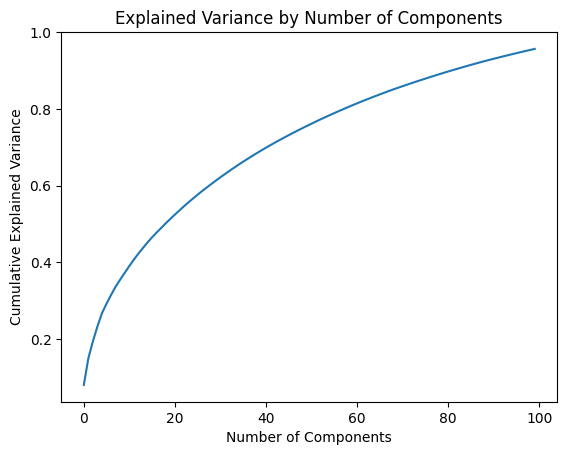

In [3]:
# To see how much variance it explaines: 
total_variance_explained = svd.explained_variance_ratio_.sum()
print("Total variance explained:", total_variance_explained)

import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(svd.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()